In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [2]:
city_data=load_boston()
housing_prices=city_data.target
housing_features=city_data.data
#client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

In [3]:
# Number of houses in the dataset
total_houses=housing_features.shape[0]
# Number of features in the dataset
numberoffeatures=housing_features.shape[1]
# Minimum housing value in the dataset
minhousevalue=np.amin(housing_prices)
# Maximum housing value in the dataset
maxhouseValue=np.amax(housing_prices)
# Mean house value of the dataset
meanValue=np.mean(housing_prices)
# Median house value of the dataset
medianValue=np.median(housing_prices)
# Standard deviation of housing values of the dataset
standdeviation=np.std(housing_prices)

print "Total number of houses : ",total_houses
print "Number of features : ",numberoffeatures
print "Min house value : ",minhousevalue
print "Max house value : ",maxhouseValue
print "Mean value : ",meanValue
print "Median vakue : ",medianValue
print "Standard Deviation : ",standdeviation


Total number of houses :  506
Number of features :  13
Min house value :  5.0
Max house value :  50.0
Mean value :  22.5328063241
Median vakue :  21.2
Standard Deviation :  9.18801154528


In [6]:
from sklearn.cross_validation import train_test_split
def shuffle_split_data(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
    return X_train,X_test,y_train,y_test

try:
    X_train,X_test,y_train,y_test=shuffle_split_data(housing_features,housing_prices)
    print "Successufully shuffled and split the data"
except:
    print "Something went wrong with shuffling and splitting"

Successufully shuffled and split the data


In [8]:
from sklearn import metrics
def performance_Metrics(y_true,y_pred):
    error=metrics.mean_squared_error(y_true,y_pred)
    return error

try:
    total_Error=performance_Metrics(y_train,y_train)
    print "Successfully performed performance metric"
except:
    print "Performance Metric unsuccessfull"

0.0
Successfully performed performance metric


In [23]:
from sklearn import svm,grid_search,datasets
def fit_model(X,y):
    regressor=DecisionTreeRegressor()
    parameters={'max_depth':(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)}
    reg=grid_search.GridSearchCV(regressor,parameters)
    reg.fit(housing_features,housing_prices)
    return reg.best_estimator_

try:
    reg=fit_model(housing_features,housing_prices)
    print "Successfully fit the model"
except:
    print "unsuccessful attempt to fit the model"

Successfully fit the model


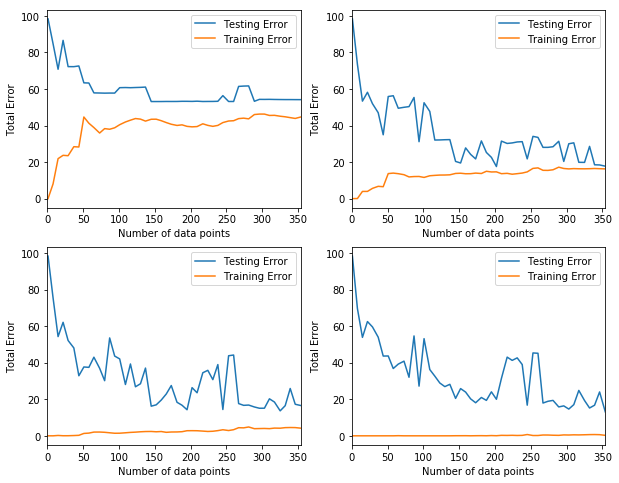

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(figsize=(10,8))
#print len(X_train)
sizes=np.linspace(1,len(X_train),50).astype(int)
train_err=np.zeros(len(sizes))
test_err=np.zeros(len(sizes))

for k,depth in enumerate([1,3,6,10]):
    for i,s in enumerate(sizes):
        regressor=DecisionTreeRegressor(max_depth=depth)
        regressor.fit(X_train[:s],y_train[:s])
        train_err[i]=performance_Metrics(y_train[:s],regressor.predict(X_train[:s]))
        test_err[i]=performance_Metrics(y_test,regressor.predict(X_test))
    ax=fig.add_subplot(2,2,k+1)
    ax.plot(sizes,test_err,label='Testing Error')
    ax.plot(sizes,train_err,label='Training Error')
    ax.legend()
    ax.set_xlabel("Number of data points")
    ax.set_ylabel("Total Error")
    ax.set_xlim([0,len(X_train)])
        
        

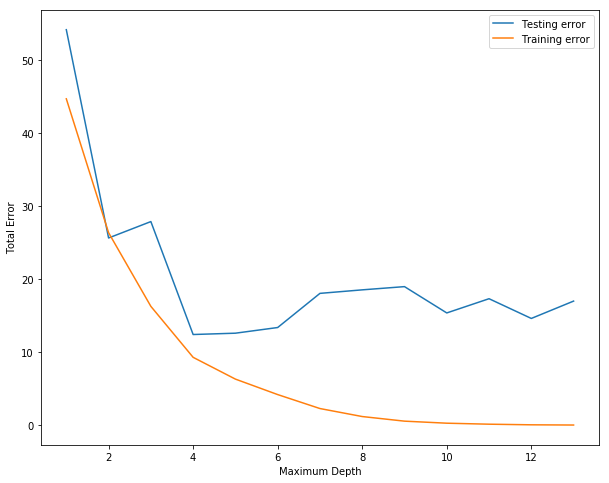

In [57]:
max_depth=np.arange(1,14)
train_err=np.zeros(len(max_depth))
test_err=np.zeros(len(max_depth))

for i,d in enumerate(max_depth):
    regressor=DecisionTreeRegressor(max_depth=d)
    regressor.fit(X_train,y_train)
    train_err[i]=performance_Metrics(y_train,regressor.predict(X_train))
    test_err[i]=performance_Metrics(y_test,regressor.predict(X_test))
plt.figure(figsize=(10,8))
plt.plot(max_depth,test_err,label="Testing error")
plt.plot(max_depth,train_err,label="Training error")
plt.legend()
plt.xlabel("Maximum Depth")
plt.ylabel("Total Error")
plt.show()
    
    